# LLM 원리 + OpenAI Chat Completion API 활용

---

## 학습 목표

1. **LLM 기본 개념**: 트랜스포머 아키텍처와 토큰 예측 원리 이해
2. **OpenAI API 기초**: Chat Completion API의 기본 사용법 습득
3. **멀티모달 활용**: 텍스트, 이미지, 오디오를 처리하는 방법 학습
4. **구조화된 출력**: JSON Schema를 사용한 구조화된 응답 생성
5. **매개변수 최적화**: Temperature, Top-p 등 주요 매개변수 활용
6. **다양한 API**: Embeddings, Moderation, Function Calling, Streaming 활용

---

## 1. LLM 기본 개념

### 1.1 LLM(Large Language Model)의 생성 원리

**LLM은 어떻게 작동하나요?**
- **트랜스포머 구조**: 대화형 AI의 핵심 아키텍처
- **토큰 예측**: 다음에 올 가장 적절한 단어를 예측
- **학습 방식**: 인터넷의 방대한 텍스트 데이터로 사전 훈련

**핵심 프로세스**
1. **토큰화**: 텍스트를 작은 단위(토큰)로 분할
2. **확률 계산**: 각 토큰이 다음에 올 확률 계산
3. **토큰 생성**: 확률 분포에 따라 토큰 선택
4. **반복**: 종료 조건까지 과정 반복


**트랜스포머**:
- **인코더-디코더 구조**: 입력과 출력을 동시에 처리
- **어텐션 메커니즘**: 입력의 모든 부분을 동시에 고려하여 중요한 정보에 집중


<div style="text-align: left; font-size: 12px;">
<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Transformer%2C_full_architecture.png/440px-Transformer%2C_full_architecture.png"
        alt="Illustrations for the Transformer and attention mechanism showing the full Transformer architecture"
        width="600"
        style="border: 0;">
</div>

**Image Title:** Transformer Architecture Illustration  
**Source:** [GitHub - DL Visuals](https://github.com/dvgodoy/dl-visuals/?tab=readme-ov-file)  
**License:** [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)  
**Author(s):** dvgodoy  

</div>

---

## 2. OpenAI API 핵심 개념

### 1.1 주요 구성 요소

**1. 메시지 형식**

  ```python
  messages = [
      {"role": "system", "content": "당신은 도움이 되는 AI 어시스턴트입니다."},
      {"role": "user", "content": "파이썬에서 리스트를 정렬하는 방법을 알려주세요."},
      {"role": "assistant", "content": "sort() 메서드나 sorted() 함수를 사용할 수 있습니다."}
  ]
  ```

**2. 현재 사용 가능한 주요 모델 (2025년 기준)**

  - **gpt-4.1**: 최고 성능, 복잡한 작업용
  - **gpt-4.1-mini**: 빠른 속도, 비용 효율적
  - **gpt-4.1-nano**: 초고속, 최저 비용
  - **o3, o4-mini**: 복잡한 추론 작업용
  - **gpt-4o**: 멀티모달 (텍스트, 이미지, 오디오)

  > ** 참고**: 모델 목록은 지속적으로 업데이트됩니다. 최신 모델 정보는 [OpenAI Platform - Models](https://platform.openai.com/docs/models)에서 확인하세요.

**3. API 응답 구조**

  ```json
  {
    "id": "chatcmpl-...",
    "object": "chat.completion",
    "model": "gpt-4.1-mini",
    "choices": [
      {
        "message": {
          "role": "assistant", 
          "content": "생성된 텍스트"
        }
      }
    ],
    "usage": {
      "prompt_tokens": 10,
      "completion_tokens": 50,
      "total_tokens": 60
    }
  }
  ```


---

## 3. 환경 설정


- **uv 프로젝트 설정**
    - **프로젝트 생성**: `uv init [프로젝트명]`
    - **가상환경 생성**: `uv venv --python=3.12`
    - **가상환경 활성화**: `.venv/bin/activate` (Unix) 또는 `.venv\Scripts\activate` (Windows)


- **패키지 설치**

    ```bash
    # uv 사용 (권장)
    uv add langchain langchain_openai python-dotenv ipykernel

    # pip 사용
    pip install langchain langchain_openai python-dotenv ipykernel
    ```

- **API 키 설정**

    ```python
    # .env 파일 생성
    OPENAI_API_KEY=your_api_key_here

    # Python에서 로드
    from dotenv import load_dotenv
    import os

    load_dotenv()
    OPENAI_API_KEY = os.getenv("OPENAI_API_KEY") # OPENAI_API_KEY = LangChain 문서상 정의되어있는 명칭
    ```


In [2]:
from dotenv import load_dotenv
load_dotenv()  # .env 파일에서 환경 변수 로드

True

In [3]:
import os
# os.getenv("OPENAI_API_KEY") # API key 확인, 단 이렇게 소스코드에 key 있는 건 보안상 권장되지 않음 -> 환경변수로 관리, 환경변수는 .gitignore 대상


---

## 4. 기본 사용법

### 4.1 텍스트 답변을 생성

* OpenAI 클라이언트 설정
  - `from openai import OpenAI`로 OpenAI 패키지를 임포트합니다
  - `client = OpenAI()`로 API 클라이언트를 생성합니다
  - API 키는 환경변수나 직접 설정을 통해 제공할 수 있습니다
  - 보안을 위해 API 키는 `.env` 파일이나 환경변수를 통해 관리하는 것이 권장됩니다

* Chat Completion 요청 구조
  - `client.chat.completions.create()`를 통해 텍스트 생성을 요청합니다
  - `model`: 사용할 모델을 지정 (예: "gpt-4.1-mini")
  - `messages`: 대화 맥락을 리스트 형태로 전달
    - `role`: "system", "user" 등의 역할 지정
    - `content`: 실제 메시지 내용
  - `temperature`: 생성 텍스트의 무작위성 조절 (0~1)
  - `max_tokens`: 생성될 최대 토큰 수 제한

* 응답 처리
  - API는 JSON 형태로 응답을 반환합니다
  - `response.choices[0].message.content`: 생성된 분석 텍스트
  - `response.usage`: 토큰 사용량 정보
  - `response.id`: 응답의 고유 식별자
  - `response.model`: 사용된 모델 정보


In [4]:
# OpenAI API를 직접 사용하는 방법 (에러 처리 포함)
from openai import OpenAI
from openai import OpenAIError, APIError, RateLimitError, APIConnectionError

# 통신을 위한 클라이언트 생성 (.env 파일을 사용하지 않는 경우에는 주석을 해제하고 api_key를 직접 입력)
client = OpenAI(
    # api_key = OPENAI_API_KEY,
)

# 2026.2.4(수) 20h15 내가 발급받은 openAi api 동작 잘 되는지 확인
try:
    # Completion 요청 (prompt -> completion)
    response = client.chat.completions.create(
        model="gpt-4.1-mini-2025-04-14", # 모델마다 시간 인식 오류 있음 <- 모델은 과거에 머물러 있음 -> 프롬프트에 '오늘, 최근, 최신' 등의 단어 사용하는 거 위험, 정확한 일시를 제공해야 함
        messages=[
            # system 역할 - 전반적인 동작 방식 정의 (GPT-4 계열에서 권장)
            {"role": "system", "content": "You are a helpful programming assistant."},
            # user 역할 - 실제 요청 내용
            {"role": "user", "content": "오늘 날짜는 언제인가요?"},
        ],
        temperature=0.7, # 21h45 나의 질문 = temperature 특정 값에 대해, 또는 값 바꿔가면서, 반복 api 호출해서 답 비교/평가하는 애플리케이션/프로그램은 어떻게 생겼을까?
        max_tokens=2000, # 토큰 = 단어
    )
    
    # 결과 출력
    print(response) # 응답 객체 전체 출력
    print("="*100)
    print("id:", response.id)
    print("-"*100)
    print('model:', response.model)
    print("-"*100)
    print("text:", response.choices[0].message.content)
    print("-"*100)
    print("usage:", response.usage) # completion_tokens = 답변, prompt_tokens = 질문

except RateLimitError as e:
    print(f"⚠️ Rate Limit 오류: API 사용량 한도를 초과했습니다. 잠시 후 다시 시도해주세요.")
    print(f"상세 정보: {e}")
except APIConnectionError as e:
    print(f"⚠️ 연결 오류: OpenAI API 서버에 연결할 수 없습니다. 네트워크 연결을 확인해주세요.")
    print(f"상세 정보: {e}")
except APIError as e:
    print(f"⚠️ API 오류: OpenAI API에서 오류가 발생했습니다.")
    print(f"상세 정보: {e}")
except OpenAIError as e:
    print(f"⚠️ OpenAI 오류: {e}")
except Exception as e:
    print(f"⚠️ 예상치 못한 오류가 발생했습니다: {e}")

ChatCompletion(id='chatcmpl-D6Ta3xXR0Iwn900guQZtM3CEsvtIx', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='오늘 날짜는 2024년 6월 1일입니다. 도움이 필요하시면 언제든지 말씀해 주세요!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770436047, model='gpt-4.1-mini-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_75546bd1a7', usage=CompletionUsage(completion_tokens=26, prompt_tokens=25, total_tokens=51, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
id: chatcmpl-D6Ta3xXR0Iwn900guQZtM3CEsvtIx
----------------------------------------------------------------------------------------------------
model: gpt-4.1-mini-2025-04-14
-------------------------------------------------------------------------

In [5]:
# 결과 출력 (Markdown)
from IPython.display import Markdown, display

display(Markdown(response.choices[0].message.content))

오늘 날짜는 2024년 6월 1일입니다. 도움이 필요하시면 언제든지 말씀해 주세요!

---
여기부터는 정보 구조화하는 지능 중요, 상용 모델 vs 오픈소스 모델 성능 차이 많이 남
### 4.2 구조화된 JSON (객체) 출력

구조화된 출력은 데이터 처리와 분석에 용이하며, API 응답의 일관성을 보장합니다.

* JSON Schema 정의
  - `response_format`을 통해 응답의 형식을 JSON으로 지정합니다
  - `json_schema`에서 데이터 구조와 각 필드의 특성을 정의합니다
    - `type`: 데이터 타입 (string, number 등)
    - `description`: 각 필드에 대한 설명
    - `required`: 필수 필드 지정
    - `additionalProperties`: 추가 속성 허용 여부

* 정보 추출 과정
  - 입력된 텍스트에서 정규화된 형태로 정보를 추출
  - 지정된 스키마에 맞춰 JSON 객체 구성
  - 필수 필드가 누락되지 않도록 검증
  - 가격과 같은 숫자 정보는 적절한 형식으로 변환

In [6]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-mini-2025-04-14",
    messages=[
        {
            "role": "system",
            "content": "상품 정보를 구조화된 형태로 추출하고, 각 속성에 대해 자세히 설명합니다."
        },
        {
            "role": "user",
            "content": "애플 아이폰 15 프로 256GB (블랙) - 1,500,000원"
        }
    ],
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "product_schema",
            "description": "상품의 상세 정보를 구조화하기 위한 스키마",
            "schema": {
                "type": "object",
                "properties": {
                    "brand": {
                        "type": "string",
                        "description": "제조사 또는 브랜드 이름 (예: 애플, 삼성, LG 등)"
                    },
                    "model": {
                        "type": "string",
                        "description": "제품의 모델명 또는 시리즈명"
                    },
                    "capacity": {
                        "type": "string",
                        "description": "저장 용량 또는 규격 (예: 256GB, 512GB 등)"
                    },
                    "color": {
                        "type": "string",
                        "description": "제품의 색상"
                    },
                    "price": {
                        "type": "number",
                        "description": "제품의 가격 (단위: 원)",
                        "minimum": 0
                    },
                    "category": {
                        "type": "string",
                        "description": "제품의 카테고리 (예: 스마트폰, 노트북 등)"
                    },
                },
                "required": ["brand", "model", "price"],
                "additionalProperties": False
            }
        }
    }
)

# 결과 출력
print(response)
print("="*100)
print("id:", response.id)
print("-"*100)
print('model:', response.model)
print("-"*100)
print("text:", response.choices[0].message.content)
print("-"*100)
print("usage:", response.usage)

ChatCompletion(id='chatcmpl-D6TaJgICwY7EC6Lq0onGGvkSsvtuZ', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{"brand":"애플","model":"아이폰 15 프로","capacity":"256GB","color":"블랙","price":1500000,"category":"스마트폰"}', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770436063, model='gpt-4.1-mini-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_75546bd1a7', usage=CompletionUsage(completion_tokens=36, prompt_tokens=404, total_tokens=440, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
id: chatcmpl-D6TaJgICwY7EC6Lq0onGGvkSsvtuZ
----------------------------------------------------------------------------------------------------
model: gpt-4.1-mini-2025-04-14
-----------------

In [7]:
import json

data = json.loads(response.choices[0].message.content)
data

{'brand': '애플',
 'model': '아이폰 15 프로',
 'capacity': '256GB',
 'color': '블랙',
 'price': 1500000,
 'category': '스마트폰'}

---

### 4.3 이미지 분석 (멀티모달)

OpenAI API를 사용한 이미지 분석(멀티모달 기능을 통해 이미지에 대한 상세 분석과 설명을 자연어로 얻을 수 있습니다.


* 이미지 입력 방식
  - URL 방식
    - 웹상의 이미지 URL을 직접 전달
    - `image_url` 파라미터를 통해 이미지 URL 지정
    - 인터넷 접근이 가능한 이미지에 대해 사용
  
  - Base64 인코딩 방식
    - 로컬 이미지 파일을 Base64 문자열로 변환
    - `encode_image()` 함수로 이미지 파일을 Base64로 인코딩
    - 인코딩된 문자열을 `data:image/jpeg;base64,` 형식으로 전달
    - 로컬 이미지나 비공개 이미지 처리에 적합

* API 요청 구조
  - `messages` 배열에 멀티모달 컨텐츠 포함
    - `type`: "text" 또는 "image_url"로 컨텐츠 유형 구분
    - 텍스트와 이미지를 함께 전달 가능
    - `role`을 통해 개발자/사용자 역할 지정


`(1) 이미지 URL 사용`

> **필요 파일**: Base64 예제에서 사용하는 `data/celltrion_report_chart.jpg` 파일이 필요합니다.

- uv add pillow

In [8]:
# 이미지 출력
from IPython.display import Image, display

# 예시 이미지 URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/600px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

# 노트북에 이미지 출력
display(Image(url=image_url))

이미지 크기: (600, 391)
이미지 모드: RGB
이미지 포맷: JPEG


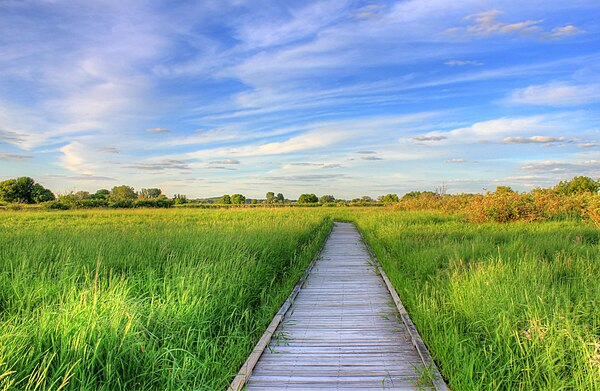

이미지 다운로드 및 표시 완료!


In [9]:
import httpx
import asyncio
from PIL import Image
from io import BytesIO

async def download_and_display_image(image_url):
    """이미지를 비동기로 다운로드하고 표시하는 함수"""
    
    async with httpx.AsyncClient(headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}) as client:
        # 비동기로 이미지 다운로드
        response = await client.get(image_url)
        
        # 응답 상태 확인
        response.raise_for_status()
        
        # 이미지 열기
        img = Image.open(BytesIO(response.content))
        
        # 이미지 정보 출력
        print(f"이미지 크기: {img.size}")
        print(f"이미지 모드: {img.mode}")
        print(f"이미지 포맷: {img.format}")
        
        # 이미지 출력
        display(img)
        
        return img


try:
    img = await download_and_display_image(image_url)
    print("이미지 다운로드 및 표시 완료!")
except httpx.HTTPError as e:
    print(f"HTTP 에러 발생: {e}")
except Exception as e:
    print(f"일반 에러 발생: {e}")

In [10]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What's in this image? Answer in 한국어."}, # 프롬프트 일부에 한국어 명시적으로 밝히는 것도 좋음 -> 사용자가 한국어 사용한다는 힌트를 줌
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    }
                },
            ],
        }
    ],
)

# 결과 출력
print(response)
print("="*100)
print("id:", response.id)
print("-"*100)
print('model:', response.model)
print("-"*100)
print("text:", response.choices[0].message.content)
print("-"*100)
print("usage:", response.usage)

ChatCompletion(id='chatcmpl-D6Tafma6LH5Zmb12dSlL2PwONIG4L', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 이미지는 넓은 초원 또는 들판 가운데에 나무로 만든 산책로가 뻗어 있는 풍경을 보여줍니다. 하늘은 파랗고 구름이 약간 흩어져 있어 맑고 평화로운 분위기를 느낄 수 있습니다. 주변에는 초록색 풀과 나무들이 많이 자라고 있습니다.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770436085, model='gpt-4.1-mini-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_75546bd1a7', usage=CompletionUsage(completion_tokens=80, prompt_tokens=419, total_tokens=499, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
id: chatcmpl-D6Tafma6LH5Zmb12dSlL2PwONIG4L
----------------------------------------------------------------------------------------------------
model: gpt-4.1-mini-

`(2)  Base 64 encoded format 사용`

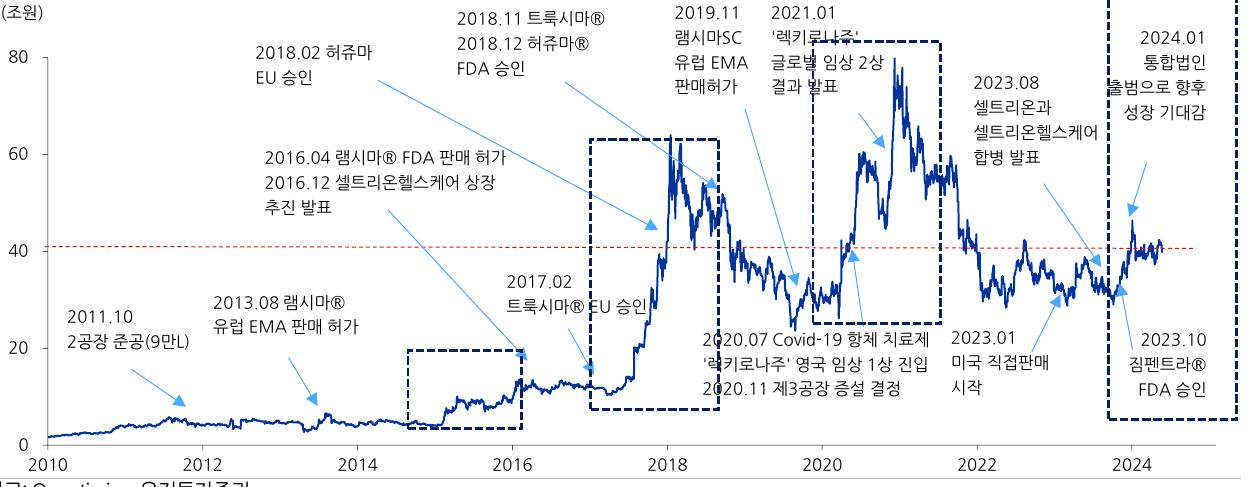

In [11]:
# 로컬 이미지 파일 경로
image_path = "data/celltrion_report_chart.jpg"

# 이미지 출력
img = Image.open(image_path)
display(img)

In [12]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# 이미지를 base64 포맷 문자열로 변환
base64_image = encode_image(image_path)

base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHnBOMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3SXUIYtTt9PAZ7iZGkwo4RFxlm9BkgDuSfQHGfc+K9OtLmS3kg1cvGxVjFo93IpI9GWIgj3BIqvpB83xr4kkk5kjW1gTPaMIXH/jzv+VZXiKDWL63jg1rUW02xvbhbOO30ht0hLkgGSZwPl9VVR6ZIoA6jRtasNf08X+mzNL

In [13]:
import base64
from openai import OpenAI

client = OpenAI()

# 이전 셀에서 정의한 encode_image 함수 재사용
# 이미지를 base64 포맷 문자열로 변환
base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {
            "role": "system",
            "content": [
                {
                    "type": "text",
                    "text": """You are a financial chart analyst. For any chart:
                            1. Identify the financial metrics being displayed
                            2. Note key price levels, support/resistance areas
                            3. Identify significant trends and pattern formations
                            4. Calculate relevant indicators (if visible)
                            5. Highlight trading volume patterns
                            6. Point out any significant market events
                            7. Provide technical analysis insights
                            Be specific with price levels and dates. Answer in 한국어."""
                }
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What does this chart show?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 차트는 셀트리온헬스케어(또는 셀트리온)의 매출액(단위: 조원) 추이를 2010년부터 2024년까지 연도별로 나타낸 그래프입니다. 다음은 주요 특징입니다.\n\n1. **재무지표**: 세로축은 매출액(조원)을 나타내며, 가로축은 연도를 표시하고 있습니다. 매출액은 0조원대 초반에서 시작해 최대 약 70조원대까지 성장한 모습입니다.\n\n2. **주요 가격 및 지지/저항 구간**:\n   - 약 40조원 선이 반복적으로 중요한 매출 기준점(저항선 혹은 지지선 역할)으로 보입니다.\n   - 2016년 후반부터 2018년 초반까지 급격한 매출 증가 구간이 뚜렷합니다.\n   - 2018년 이후에는 매출의 변동성이 크며 60~70조원대 고점과 30~40조원대 저점을 반복하고 있습니다.\n\n3. **중요한 트렌드 및 패턴**:\n   - 2016년부터 대규모 성장 구간(램시마 FDA 판매 허가, EU 승인 등) 시작.\n   - 2018년 11~12월 트록시마 등록 및 FDA 승인으로 최대 매출 구간 형성.\n   - 2020년 초 코로나19 치료제 관련 임상 진입으로 매출 변동.\n   - 2023년 셀트리온-셀트리온헬스케어 합병 발표 이후 일정 매출 변동.\n   - 2024년 통합법인 출범을 통해 향후 성장 기대감 표기.\n\n4. **중요 지표 및 이벤트**:\n   - FDA, EU 판매 승인이 매출 급증 시점과 일치.\n   - 코로나19 치료제 임상 진입 시점(2020년)에서 매출에 영향.\n   - 2023년 미국 직접판매 시작, 셀트리온과 합병 발표 등 주요 이벤트가 매출 변화와 연결됨.\n\n5. **거래량(매출량) 패턴**:\n   - 매출이 급격히 증가하는 구간이 몇 차례 있어 기업의 성장과 주요 허가, 계약 성사 시점과 연관있음.\n\n6. **기술적 분석 인사이트**:\n   

In [14]:
print(response.choices[0].message.content)

이 차트는 셀트리온헬스케어(또는 셀트리온)의 매출액(단위: 조원) 추이를 2010년부터 2024년까지 연도별로 나타낸 그래프입니다. 다음은 주요 특징입니다.

1. **재무지표**: 세로축은 매출액(조원)을 나타내며, 가로축은 연도를 표시하고 있습니다. 매출액은 0조원대 초반에서 시작해 최대 약 70조원대까지 성장한 모습입니다.

2. **주요 가격 및 지지/저항 구간**:
   - 약 40조원 선이 반복적으로 중요한 매출 기준점(저항선 혹은 지지선 역할)으로 보입니다.
   - 2016년 후반부터 2018년 초반까지 급격한 매출 증가 구간이 뚜렷합니다.
   - 2018년 이후에는 매출의 변동성이 크며 60~70조원대 고점과 30~40조원대 저점을 반복하고 있습니다.

3. **중요한 트렌드 및 패턴**:
   - 2016년부터 대규모 성장 구간(램시마 FDA 판매 허가, EU 승인 등) 시작.
   - 2018년 11~12월 트록시마 등록 및 FDA 승인으로 최대 매출 구간 형성.
   - 2020년 초 코로나19 치료제 관련 임상 진입으로 매출 변동.
   - 2023년 셀트리온-셀트리온헬스케어 합병 발표 이후 일정 매출 변동.
   - 2024년 통합법인 출범을 통해 향후 성장 기대감 표기.

4. **중요 지표 및 이벤트**:
   - FDA, EU 판매 승인이 매출 급증 시점과 일치.
   - 코로나19 치료제 임상 진입 시점(2020년)에서 매출에 영향.
   - 2023년 미국 직접판매 시작, 셀트리온과 합병 발표 등 주요 이벤트가 매출 변화와 연결됨.

5. **거래량(매출량) 패턴**:
   - 매출이 급격히 증가하는 구간이 몇 차례 있어 기업의 성장과 주요 허가, 계약 성사 시점과 연관있음.

6. **기술적 분석 인사이트**:
   - FDA, EU 승인과 같은 규제 허가가 매출 성장의 중요한 촉매임.
   - 40조원대 매출 수준이 기술적 지지/저항 영역으로 작용할 가능성.
   - 최근(2024년) 통합법인 출범 기대감이 매출 안정에 

---

### 4.4 오디오 출력


OpenAI API의 음성 생성(Text-to-Speech) 기능을 통해 텍스트 응답을 자연스러운 음성으로 변환하여 활용할 수 있습니다.

* API 요청 설정
  - `model`: "gpt-4o-mini-audio-preview"와 같은 오디오 지원 모델 사용
  - `modalities`: ["text", "audio"]로 텍스트와 오디오 모두 출력
  - `audio` 파라미터 설정
    - `voice`: 음성 종류 선택 (예: "alloy")
    - `format`: 출력 포맷 지정 (예: "wav")

* 음성 생성 과정
  - API는 텍스트 응답과 함께 Base64로 인코딩된 오디오 데이터 반환
  - 응답 구조:
    - `completion.choices[0].message.content`: 텍스트 응답
    - `completion.choices[0].message.audio.data`: Base64 인코딩된 오디오 데이터

* 오디오 파일 저장
  - Base64 디코딩
    ```python
        wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
    ```
  - 파일로 저장
    ```python
        with open("sample.wav", "wb") as f:
            f.write(wav_bytes)
    ```

In [15]:
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini-audio-preview",
    modalities=["text", "audio"], # 멀티모달
    audio={"voice": "alloy", "format": "wav"}, # 답변을 음성으로 하도록 함
    messages=[
        {
            "role": "user",
            "content": "안녕하세요. 대한민국의 수도는 어디인가요?"
        }
    ]
)

print(completion.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=ChatCompletionAudio(id='audio_6986b61baf908191ae5de2f4379237aa', data='UklGRv////9XQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAAZGF0Yf////8ZABUAEgAXABUAFAAZABQAGgAWABgAFQAMABYADQAXAA4AFQANAA0ADwAEAAwABgALAAcABwAKAAUABwAEAAUAAgACAAEA//8AAP//BgD8/////v/2//7/8//6/+3//f/y//f/9f/y//b/8P/2/+7/9v/z//T/7f/w/+//9P/z//D/9f/s//L/7P/x//D/9P/v//P/8P/y//D/8//3//L/9P/w//T/8f/x//X/9P/7//H/9f/x//D/9v/v//r/8P/0/+7/7v/5//D/9P/s//X/6f/0//T/8v/y/+r/9f/t//L/6f/s/+n/6P/r/+n/6v/i/+f/5v/n/+H/4f/e/9//2f/b/9v/2f/b/9T/1f/Z/9X/z//S/9H/0f/T/9f/y//R/8f/z//I/9D/yv/L/87/x//N/8X/yv/G/83/yf/H/8v/yP/N/8T/y//M/8v/zP/I/83/zf/N/8//zP/U/8n/1P/K/9T/z//T/9L/z//a/9T/1//W/9r/1//Z/9j/3//b/+H/4P/Y/+D/4P/h/+H/4f/j/9//4//i/+j/5v/l/+j/5//o/+b/6//x/+v/8P/p//P/7f/8//n/9v/7/+///v/z/wgA8/8LAP7/BAAJAAIACgAAABUACwAKAAwADAARAAcAFQARABcAFAAVABcAEwAcABUAHQAVABwAGwAgACIAHgAjABsAJQAeACcAHQAhAB8AGgAjAB4AIg

In [16]:
# 음성 파일 저장
import base64

wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
with open("sample.wav", "wb") as f:
    f.write(wav_bytes)

In [17]:
# 토큰 사용량
print(completion.usage)

CompletionUsage(completion_tokens=371, prompt_tokens=18, total_tokens=389, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=299, reasoning_tokens=0, rejected_prediction_tokens=0, text_tokens=72), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0, text_tokens=18, image_tokens=0))


---


**[실습 1]**: OpenAI 클라이언트를 초기화하고 환경변수에서 API 키를 가져오도록 코드를 작성하세요.
- `힌트: python-dotenv 패키지를 사용하세요.`


In [18]:
# 여기에 코드를 작성하세요
# 힌트:
# 1. from dotenv import load_dotenv 임포트
from dotenv import load_dotenv

# 2. load_dotenv()로 .env 파일 로드
load_dotenv()

# 3. from openai import OpenAI 임포트
from openai import OpenAI

# 4. client = OpenAI()로 클라이언트 초기화
client = OpenAI()


**[실습 2]**: 주어진 프롬프트에 대해 OpenAI API(gpt-4.1-mini)로 응답을 생성하는 함수를 작성하세요.

In [25]:
from openai import OpenAI

def get_simple_completion(prompt: str) -> str:
    client = OpenAI() # 환경 변수에 OPENAI_API_KEY가 설정되어 있다고 가정

    # 힌트:
    # 1. client.chat.completions.create() 호출
    response = client.chat.completions.create(
        # 2. model="gpt-4.1-mini" 지정
        model = "gpt-4.1-mini",
        
        # 3. messages에 user role로 prompt 전달
        messages = [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt
                    }
                ]
            }
        ]        
    )
    
    # 4. response.choices[0].message.content 반환
    return response.choices[0].message.content

# 함수 테스트 예시
result = get_simple_completion("what is LOVE?")
print(result)

    

Love is a complex and multifaceted emotion, often described as a deep affection, care, and connection toward someone or something. It can take many forms, including romantic love, familial love, friendship, and self-love. Love involves feelings of warmth, compassion, attachment, and sometimes sacrifice. Philosophers, poets, and scientists have all explored love, highlighting its importance in human relationships and well-being. Ultimately, love is a powerful force that motivates kindness, empathy, and connection between people.


---

## 5. 매개변수 최적화

### 5.1 주요 매개변수 

| 매개변수 | 범위 | 용도 | 추천값 |
|---------|------|------|--------|
| `temperature` | 0~2 | 창의성 조절 | 0.3 (정확성), 0.7 (균형), 1.2 (창의성) |
| `top_p` | 0~1 | 응답 다양성 | 0.9 (기본), 0.3 (집중적) |
| `max_tokens` | 1~8192+ | 최대 길이 | 작업에 따라 조절 |
| `frequency_penalty` | -2~2 | 반복 억제 | 0.3~0.6 |
| `presence_penalty` | -2~2 | 새 주제 도입 | 0.3~0.6 |

### 5.2 시나리오별 설정


**1. 정확한 정보 제공**

In [21]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "파이썬 딕셔너리 메서드들을 설명해주세요."}],
    temperature=0.2,  # 낮은 창의성
    top_p=0.3,        # 집중적 응답
    max_tokens=500
)

print(response.choices[0].message.content)

파이썬 딕셔너리(dictionary)는 키(key)와 값(value)의 쌍으로 데이터를 저장하는 자료구조입니다. 딕셔너리에서 자주 사용하는 메서드들을 설명드리겠습니다.

---

### 1. `dict.get(key, default=None)`
- **설명**: 딕셔너리에서 `key`에 해당하는 값을 반환합니다. 만약 `key`가 없으면 `default` 값을 반환합니다. `default`를 지정하지 않으면 `None`을 반환합니다.
- **예시**:
  ```python
  d = {'a': 1, 'b': 2}
  print(d.get('a'))       # 출력: 1
  print(d.get('c'))       # 출력: None
  print(d.get('c', 0))    # 출력: 0
  ```

---

### 2. `dict.keys()`
- **설명**: 딕셔너리의 모든 키를 반환합니다. 반환값은 `dict_keys` 객체로, 리스트처럼 반복(iterate)할 수 있습니다.
- **예시**:
  ```python
  d = {'a': 1, 'b': 2}
  print(d.keys())         # 출력: dict_keys(['a', 'b'])
  for key in d.keys():
      print(key)
  ```

---

### 3. `dict.values()`
- **설명**: 딕셔너리의 모든 값을 반환합니다. 반환값은 `dict_values` 객체입니다.
- **예시**:
  ```python
  d = {'a': 1, 'b': 2}
  print(d.values())       # 출력: dict_values([1, 2])
  ```

---

### 4. `dict.items()`
- **설명**: 딕셔너리의 (키, 값) 쌍을 튜플 형태로 반환합니다. 반환값은 `dict_items` 객체입니다.
- **예시**:
  ```python
  d = {'a': 1, 'b': 2}
  print(d.items())      

**2. 창의적 글쓰기**

In [20]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "우주 정거장에서의 하루를 소설로 써주세요."}],
    temperature=1.1,  # 높은 창의성
    top_p=0.9,        # 다양한 표현
    max_tokens=1000,
    frequency_penalty=0.5  # 반복 방지
)

print(response.choices[0].message.content)

물론입니다! 우주 정거장에서의 하루를 배경으로 한 짧은 소설을 작성해 드릴게요.

---

**우주 정거장에서의 하루**

지구로부터 약 400킬로미터 떨어진 곳, 무중력 상태의 우주 정거장에서는 또 다른 하루가 시작되었다. 창문 너머로 보이는 푸른 지구는 마치 보석처럼 빛났다.

“굿모닝, 리아.” 동료 우주비행사 마이크가 웃으며 인사했다.

리아는 미소를 지으며 둥근 통로를 따라 떠다녔다. 몸이 가벼워서 걷기보다는 떠오르는 느낌이었다. “오늘도 평소와 다름없이 바쁘겠지.”

첫 일정은 실험실에서 진행하는 식물 재배 실험이었다. 작은 유리관 안에 심어진 토마토 씨앗이 자라는 과정을 관찰하고 기록하는 일이었다. 리아는 조심스레 손가락으로 버튼을 눌러 영양액을 공급했다.

“식물이 이렇게 무중력 상태에서 자라는 모습을 보면 항상 신기해.” 그녀가 중얼거렸다.

시간이 흐르면서 태양은 서서히 지구 저편으로 넘어갔다. 우주 정거장의 내부에는 낮과 밤이 없지만, 그들은 24시간 주기로 생활 패턴을 유지하기 위해 인공 조명을 조절했다.

점심 시간에는 각자 개인용 식량 팩에서 음식을 꺼내 먹었다. 리아는 알갱이가 뭉쳐 있는 에너지 바를 손에 들고 천천히 음미했다. 입안에서 녹는 맛은 지구의 신선한 음식과는 달랐지만, 이곳에서는 최고의 한 끼였다.

오후에는 대규모 점검 작업이 기다리고 있었다. 마이크와 함께 외부 도킹 포트를 점검하러 나갔다. 우주복을 입고 공기 잠금을 통과할 때마다 심장이 두근거렸다.

밖으로 나가면 끝없이 펼쳐진 검푸른 우주의 바다가 기다리고 있다. 별들은 가까운 듯 반짝였고, 지구는 점점 커져가는 푸른 구체였다.

“우리는 정말 특별한 곳에 있지.” 마이크가 속삭였다.

“응, 그리고 여기서 우리가 하는 일들이 미래를 만든다고 생각해.”

어느덧 하루가 지나고, 다시 무중력 숙소에 들어온 리아는 잠시 창밖을 바라보았다. 세상의 모든 걱정은 저 아래에 있고, 자신은 지금 이 공간에서 작은 역사 한 페이지를 쓰고 있었다.

"내일도 새로운 발견이 기다

**3. 코드 생성**

In [22]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "웹 스크래핑을 위한 Python 함수를 만들어주세요."}],
    temperature=0.4,  # 약간의 창의성
    max_tokens=800
)

print(response.choices[0].message.content)

물론입니다! 웹 스크래핑을 위한 기본적인 Python 함수를 만들어 드리겠습니다. 여기서는 `requests`와 `BeautifulSoup` 라이브러리를 사용하여 웹 페이지의 HTML을 가져오고, 특정 데이터를 추출하는 예제를 보여드리겠습니다.

먼저 필요한 라이브러리를 설치해야 합니다:

```bash
pip install requests beautifulsoup4
```

아래는 간단한 웹 스크래핑 함수 예제입니다:

```python
import requests
from bs4 import BeautifulSoup

def scrape_webpage(url, selector):
    """
    주어진 URL에서 HTML을 가져와서 CSS 선택자(selector)에 해당하는 요소들의 텍스트를 리스트로 반환합니다.

    :param url: 스크래핑할 웹 페이지 URL (문자열)
    :param selector: 추출할 요소의 CSS 선택자 (문자열)
    :return: 선택자에 해당하는 요소들의 텍스트 리스트
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # 요청이 성공했는지 확인

        soup = BeautifulSoup(response.text, 'html.parser')
        elements = soup.select(selector)

        return [element.get_text(strip=True) for element in elements]

    except requests.RequestException as e:
        print(f"웹 페이지 요청 중 오류가 발생했습니다: {e}")
        return []
    except Exception as e:
        print(f"스크래핑 중 오류가 발생했습니다: {e}")
        return []

#

---

## 6. 토큰 사용량 및 비용 계산

### 6.1 토큰 사용량 이해하기

OpenAI API는 토큰 단위로 과금됩니다. 토큰은 텍스트의 작은 단위로, 영어는 약 4자당 1토큰, 한글은 약 1-2자당 1토큰입니다.

**토큰 구성**
- **prompt_tokens**: 입력 토큰 (system + user 메시지)
- **completion_tokens**: 출력 토큰 (assistant 응답)
- **total_tokens**: 전체 토큰 (입력 + 출력)

In [23]:
from openai import OpenAI

client = OpenAI()

# 예제: 토큰 사용량 확인
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "파이썬에서 리스트와 튜플의 차이점을 설명해주세요."}
    ]
)

# 토큰 사용량 확인
usage = response.usage
print(f"입력 토큰: {usage.prompt_tokens}")
print(f"출력 토큰: {usage.completion_tokens}")
print(f"총 토큰: {usage.total_tokens}")
print("-" * 50)

# 비용 계산 (2025년 1월 기준 예시 가격)
# gpt-4.1-mini: 입력 $0.075 / 1M tokens, 출력 $0.300 / 1M tokens
input_cost = (usage.prompt_tokens / 1_000_000) * 0.075
output_cost = (usage.completion_tokens / 1_000_000) * 0.300
total_cost = input_cost + output_cost

print(f"입력 비용: ${input_cost:.6f}")
print(f"출력 비용: ${output_cost:.6f}")
print(f"총 비용: ${total_cost:.6f}")
print(f"총 비용 (원화): 약 {total_cost * 1500:.4f}원")
print("-" * 50)
print("\n최신 가격 정보는 https://openai.com/api/pricing 에서 확인하세요.")

입력 토큰: 34
출력 토큰: 486
총 토큰: 520
--------------------------------------------------
입력 비용: $0.000003
출력 비용: $0.000146
총 비용: $0.000148
총 비용 (원화): 약 0.2225원
--------------------------------------------------

최신 가격 정보는 https://openai.com/api/pricing 에서 확인하세요.


---

## 7. 실습 문제

**문제 1: 언어 번역기 만들기**

In [ ]:
def translator(text, target_language):
    # 힌트:
    # 1. OpenAI 클라이언트 생성
    # 2. system 메시지로 번역기 역할 정의
    # 3. user 메시지로 번역할 텍스트와 목표 언어 전달
    # 4. 응답 반환
    
    
    return 

# 테스트
result = translator("안녕하세요, 오늘 날씨가 좋네요!", "영어")
print(result)  # 예상 출력: Hello, the weather is nice today!

**문제 2: 감정 분석기**

In [ ]:
def analyze_sentiment(text):
    # 힌트:
    # 1. OpenAI 클라이언트 생성
    # 2. response_format에 json_schema 정의
    # 3. sentiment와 confidence 필드를 포함하는 스키마 작성
    # 4. JSON 응답 파싱하여 반환
    

    return 

# 테스트
result = analyze_sentiment("오늘 시험을 잘 봤어요! 정말 기쁩니다.")
print(result)
# 예상 출력: {'sentiment': 'positive', 'confidence': 0.95}


---

## 8. OpenAI 다양한 API 활용

### 8.1 Embeddings API - 텍스트 임베딩

텍스트를 벡터로 변환하여 유사도 검색, 클러스터링, 분류 등에 활용할 수 있습니다.

**주요 용도**
- 문서 유사도 검색
- 시맨틱 검색 (의미 기반 검색)
- 추천 시스템
- 텍스트 분류 및 클러스터링

In [ ]:
from openai import OpenAI
import numpy as np

client = OpenAI()

# 텍스트를 벡터로 변환
texts = [
    "파이썬은 프로그래밍 언어입니다.",
    "Python is a programming language.",
    "사과는 과일입니다.",
    "Apple is a fruit."
]

# 임베딩 생성
embeddings = []
for text in texts:
    response = client.embeddings.create(
        model="text-embedding-3-small",  # 또는 "text-embedding-3-large"
        input=text
    )
    embeddings.append(response.data[0].embedding)

# 벡터 차원 확인
print(f"임베딩 벡터 차원: {len(embeddings[0])}")
print(f"첫 10개 값: {embeddings[0][:10]}")
print("-" * 50)

# 코사인 유사도 계산
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# 유사도 비교
print("\n📊 유사도 분석:")
print(f"'{texts[0]}' vs '{texts[1]}': {cosine_similarity(embeddings[0], embeddings[1]):.4f}")
print(f"'{texts[0]}' vs '{texts[2]}': {cosine_similarity(embeddings[0], embeddings[2]):.4f}")
print(f"'{texts[2]}' vs '{texts[3]}': {cosine_similarity(embeddings[2], embeddings[3]):.4f}")

### 8.2 Moderation API - 콘텐츠 검열

부적절한 콘텐츠를 자동으로 감지하여 필터링할 수 있습니다.

**감지 카테고리**
- 폭력적인 콘텐츠
- 혐오 발언
- 성적인 콘텐츠
- 자해 관련 내용

In [ ]:
from openai import OpenAI

client = OpenAI()

# 콘텐츠 검열 예제
texts_to_check = [
    "오늘 날씨가 정말 좋네요!",
    "I want to hurt someone",  # 부적절한 예시
]

for text in texts_to_check:
    response = client.moderations.create(
        model="omni-moderation-latest",  # 또는 "text-moderation-latest"
        input=text
    )
    
    result = response.results[0]
    print(f"\n텍스트: {text}")
    print(f"위반 여부: {result.flagged}")
    
    if result.flagged:
        print("감지된 카테고리:")
        categories = result.categories
        for category, flagged in vars(categories).items():
            if flagged:
                print(f"  - {category}")
    print("-" * 50)

### 8.3 Function Calling - 함수 호출

LLM이 외부 함수를 호출하여 동적인 작업을 수행할 수 있습니다.

**주요 사용 사례**
- API 호출 (날씨, 주식 정보 등)
- 데이터베이스 쿼리
- 계산 수행
- 외부 도구 연동

In [ ]:
import json
from openai import OpenAI

client = OpenAI()

# 1. 함수 정의 (실제 실행될 함수)
def get_current_weather(location, unit="celsius"):
    """날씨 정보를 가져오는 함수 (예시)"""
    # 실제로는 날씨 API를 호출하지만, 여기서는 더미 데이터 반환
    weather_data = {
        "location": location,
        "temperature": "22",
        "unit": unit,
        "forecast": "맑음"
    }
    return json.dumps(weather_data, ensure_ascii=False)

# 2. 함수 스키마 정의 (LLM에게 알려줄 함수 정보)
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_current_weather",
            "description": "특정 위치의 현재 날씨를 가져옵니다",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "도시명 (예: 서울, 부산)"
                    },
                    "unit": {
                        "type": "string",
                        "enum": ["celsius", "fahrenheit"],
                        "description": "온도 단위"
                    }
                },
                "required": ["location"]
            }
        }
    }
]

# 3. LLM에게 질문
messages = [{"role": "user", "content": "서울의 날씨가 어때?"}]

response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=messages,
    tools=tools,
    tool_choice="auto"  # LLM이 자동으로 함수 호출 여부 결정
)

# 4. LLM이 함수를 호출하려고 하는지 확인
response_message = response.choices[0].message
tool_calls = response_message.tool_calls

if tool_calls:
    # 5. 함수 실행
    available_functions = {
        "get_current_weather": get_current_weather,
    }
    
    messages.append(response_message)
    
    for tool_call in tool_calls:
        function_name = tool_call.function.name
        function_to_call = available_functions[function_name]
        function_args = json.loads(tool_call.function.arguments)
        
        print(f"🔧 함수 호출: {function_name}")
        print(f"   인자: {function_args}")
        
        # 실제 함수 실행
        function_response = function_to_call(**function_args)
        print(f"   결과: {function_response}")
        
        # 6. 함수 실행 결과를 LLM에게 전달
        messages.append({
            "tool_call_id": tool_call.id,
            "role": "tool",
            "name": function_name,
            "content": function_response,
        })
    
    # 7. 최종 응답 생성
    final_response = client.chat.completions.create(
        model="gpt-4.1-mini",
        messages=messages,
    )
    
    print("\n💬 최종 응답:")
    print(final_response.choices[0].message.content)

### 8.4 Streaming - 실시간 응답

응답을 실시간으로 스트리밍하여 사용자 경험을 개선할 수 있습니다.

**장점**
- 빠른 초기 응답 (First Token Time 단축)
- ChatGPT처럼 점진적으로 텍스트 생성
- 사용자에게 즉각적인 피드백 제공

In [ ]:
from openai import OpenAI

client = OpenAI()

print("💬 스트리밍 응답:\n")

# stream=True로 설정하여 스트리밍 활성화
stream = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "인공지능의 역사를 간단히 설명해주세요."}],
    stream=True  # 스트리밍 활성화
)

# 실시간으로 토큰을 받아서 출력
for chunk in stream:
    # delta에 content가 있으면 출력
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="", flush=True)

print("\n\n✅ 스트리밍 완료!")